#### Tutor name: Heqing (Eric) SHI
#### Contact email: Heqing.Shi@ed.ac.uk
#### Web: [personal page](https://shiheqing.github.io)
*Materials credit to @Zongxiao WU, the previous tutor.*

In [1]:
# import packages that we will use in this session
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Devsample_coarse_3.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5000 non-null   int64  
 1   ID          5000 non-null   float64
 2   FLAGBINARY  5000 non-null   object 
 3   PHONE       5000 non-null   object 
 4   MSTAT       5000 non-null   object 
 5   RSTAT       5000 non-null   object 
 6   KIDS        5000 non-null   float64
 7   CARDI       5000 non-null   object 
 8   CARDH2      5000 non-null   object 
 9   AGE         5000 non-null   float64
 10  TAD         5000 non-null   float64
 11  BUREAU      5000 non-null   float64
 12  SEARCH      5000 non-null   float64
 13  phone1      5000 non-null   float64
 14  PhoneWoe    5000 non-null   float64
 15  MSgrouped   5000 non-null   float64
 16  Married1    5000 non-null   float64
 17  Married2    5000 non-null   float64
 18  MSwoe       5000 non-null   float64
 19  AgeBinned   5000 non-null  

In [4]:
# only include those variables that we need
df = df[df.columns[1:19]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          5000 non-null   float64
 1   FLAGBINARY  5000 non-null   object 
 2   PHONE       5000 non-null   object 
 3   MSTAT       5000 non-null   object 
 4   RSTAT       5000 non-null   object 
 5   KIDS        5000 non-null   float64
 6   CARDI       5000 non-null   object 
 7   CARDH2      5000 non-null   object 
 8   AGE         5000 non-null   float64
 9   TAD         5000 non-null   float64
 10  BUREAU      5000 non-null   float64
 11  SEARCH      5000 non-null   float64
 12  phone1      5000 non-null   float64
 13  PhoneWoe    5000 non-null   float64
 14  MSgrouped   5000 non-null   float64
 15  Married1    5000 non-null   float64
 16  Married2    5000 non-null   float64
 17  MSwoe       5000 non-null   float64
dtypes: float64(12), object(6)
memory usage: 703.2+ KB


### 1. Exploring numeric characteristics (e.g., AGE).

a). Examine descriptive statistics and histograms of AGE. 

In [5]:
# descriptive statistics
df.AGE.describe()

count    5000.000000
mean       36.443200
std        12.465145
min        18.000000
25%        27.000000
50%        34.000000
75%        44.000000
max        71.000000
Name: AGE, dtype: float64

(array([173., 147., 136., 293., 159., 141., 311., 176., 155., 312., 185.,
        178., 314., 134., 166., 305., 119., 139., 187., 111., 101., 171.,
         75.,  61., 119.,  25.,  41.,  62.,  38.,  45.,  58.,  45.,  38.,
         72.,  33.,  30.,  43.,  27.,  46.,  29.]),
 array([18.   , 19.325, 20.65 , 21.975, 23.3  , 24.625, 25.95 , 27.275,
        28.6  , 29.925, 31.25 , 32.575, 33.9  , 35.225, 36.55 , 37.875,
        39.2  , 40.525, 41.85 , 43.175, 44.5  , 45.825, 47.15 , 48.475,
        49.8  , 51.125, 52.45 , 53.775, 55.1  , 56.425, 57.75 , 59.075,
        60.4  , 61.725, 63.05 , 64.375, 65.7  , 67.025, 68.35 , 69.675,
        71.   ]),
 <BarContainer object of 40 artists>)

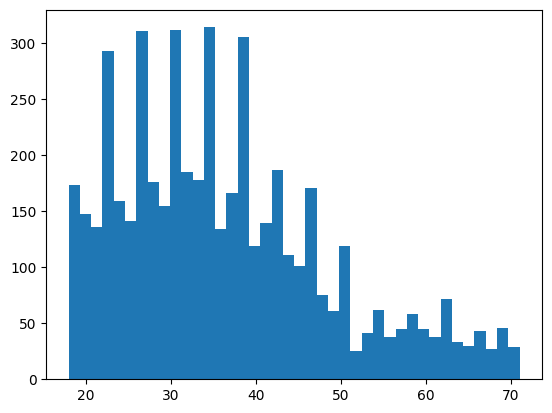

In [6]:
# histogram 
plt.hist(df.AGE,bins=40) # you can try different numbers of bins

b). Split AGE into initial fine classes to prepare them for coarse-classification.

In [7]:
# The following commands split the variable age into fine classes: 10 groups of approximate size.
df['AgeBinned'], cut_bin = pd.qcut(df['AGE'], q = 10, 
                                   labels = ['Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5', 'Age_6', 'Age_7', 'Age_8', 'Age_9', 'Age_10'],
                                   retbins = True)

c). Obtain a univariate frequency table of the new variable.

In [8]:
df['AgeBinned'].value_counts()

AgeBinned
Age_1     599
Age_6     587
Age_5     544
Age_9     503
Age_8     488
Age_3     487
Age_4     467
Age_10    466
Age_2     450
Age_7     409
Name: count, dtype: int64

### 2.	Association with Performance Flag and coarse-classification.

a). Cross-tabulation. Now we want to examine the cross-tabulation frequency table for “agebinned” and the “flag”.

In [9]:
pd.crosstab(df['AgeBinned'],df['FLAGBINARY'],margins=True,margins_name='Total')

FLAGBINARY,Bad,Good,Total
AgeBinned,,,
Age_1,185,414,599
Age_2,117,333,450
Age_3,92,395,487
Age_4,68,399,467
Age_5,54,490,544
Age_6,72,515,587
Age_7,50,359,409
Age_8,44,444,488
Age_9,40,463,503


In [10]:
# If you want the percentages given of Bad/ Good for each category:
pd.crosstab(df['AgeBinned'],df['FLAGBINARY'],normalize='index')

FLAGBINARY,Bad,Good
AgeBinned,,
Age_1,0.308848,0.691152
Age_2,0.260000,0.740000
Age_3,0.188912,0.811088
Age_4,0.145610,0.854390
Age_5,0.099265,0.900735
Age_6,0.122658,0.877342
Age_7,0.122249,0.877751
Age_8,0.090164,0.909836
Age_9,0.079523,0.920477


Good rate increases steadily for the initial 5 groups (1-5) up to 35 years old. Then there is a slight dip afterwards the increasing trend continues. We are going to keep the groups 1 to 5 separate, combine groups 6 and 7 together, combine together groups 8 and 9, leave group 10 as it is (or you can try other coarse-classified methods). 

b). Creating new coarse-classified variables and converting them into dummies.

In [11]:
# create a new AgeGrouped variable
df.loc[df['AgeBinned'] == 'Age_1','AgeGrouped'] = 'Age_1'
df.loc[df['AgeBinned'] == 'Age_2','AgeGrouped'] = 'Age_2'
df.loc[df['AgeBinned'] == 'Age_3','AgeGrouped'] = 'Age_3'
df.loc[df['AgeBinned'] == 'Age_4','AgeGrouped'] = 'Age_4'
df.loc[df['AgeBinned'] == 'Age_5','AgeGrouped'] = 'Age_5'
df.loc[df['AgeBinned'] == 'Age_6','AgeGrouped'] = 'Age_6'
df.loc[df['AgeBinned'] == 'Age_7','AgeGrouped'] = 'Age_6'
df.loc[df['AgeBinned'] == 'Age_8','AgeGrouped'] = 'Age_7'
df.loc[df['AgeBinned'] == 'Age_9','AgeGrouped'] = 'Age_7'
df.loc[df['AgeBinned'] == 'Age_10','AgeGrouped'] = 'Age_8'
df['AgeGrouped'].value_counts()

AgeGrouped
Age_6    996
Age_7    991
Age_1    599
Age_5    544
Age_3    487
Age_4    467
Age_8    466
Age_2    450
Name: count, dtype: int64

In [12]:
pd.crosstab(df['AgeGrouped'],df['FLAGBINARY'],margins=True,margins_name='Total')

FLAGBINARY,Bad,Good,Total
AgeGrouped,,,
Age_1,185,414,599
Age_2,117,333,450
Age_3,92,395,487
Age_4,68,399,467
Age_5,54,490,544
Age_6,122,874,996
Age_7,84,907,991
Age_8,25,441,466
Total,747,4253,5000


We will create one dummy variable for each bin from 2 to 8. Note that we will not create it for bin 1, making it the reference one.

In [13]:
# Convert the AgeGrouped variable to dummy variables
df_dummies = pd.get_dummies(df, columns=['AgeGrouped'])
df_dummies.head()

,ID,FLAGBINARY,PHONE,MSTAT,RSTAT,KIDS,CARDI,CARDH2,AGE,TAD,...,MSwoe,AgeBinned,AgeGrouped_Age_1,AgeGrouped_Age_2,AgeGrouped_Age_3,AgeGrouped_Age_4,AgeGrouped_Age_5,AgeGrouped_Age_6,AgeGrouped_Age_7,AgeGrouped_Age_8
0,1.0,Bad,Home number given,Single,Renting flat,0.0,No card insurance taken,No,65.0,101.0,...,-0.50,Age_10,False,False,False,False,False,False,False,True
1,2.0,Good,Home number given,Single,Renting flat,0.0,No card insurance taken,No,22.0,26.0,...,-0.50,Age_1,True,False,False,False,False,False,False,False
2,3.0,Bad,No phone number given,Married,Renting house,3.0,No card insurance taken,No,41.0,19.0,...,0.47,Age_7,False,False,False,False,False,True,False,False
3,5.0,Bad,No phone number given,Widowed,Home owner,6.0,No card insurance taken,No,40.0,237.0,...,0.47,Age_7,False,False,False,False,False,True,False,False
4,6.0,Good,Home number given,Married,Renting flat,0.0,No card insurance taken,No,70.0,5.0,...,0.47,Age_10,False,False,False,False,False,False,False,True


In [14]:
# delete the first bin dummy variable since its information can be represented by other bin variables
df_dummies.drop(['AgeGrouped_Age_1'], axis=1, inplace=True)
df_dummies.info()
# you can also try to create dummy variables for the AgeGrouped variable after class

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                5000 non-null   float64 
 1   FLAGBINARY        5000 non-null   object  
 2   PHONE             5000 non-null   object  
 3   MSTAT             5000 non-null   object  
 4   RSTAT             5000 non-null   object  
 5   KIDS              5000 non-null   float64 
 6   CARDI             5000 non-null   object  
 7   CARDH2            5000 non-null   object  
 8   AGE               5000 non-null   float64 
 9   TAD               5000 non-null   float64 
 10  BUREAU            5000 non-null   float64 
 11  SEARCH            5000 non-null   float64 
 12  phone1            5000 non-null   float64 
 13  PhoneWoe          5000 non-null   float64 
 14  MSgrouped         5000 non-null   float64 
 15  Married1          5000 non-null   float64 
 16  Married2          5000 n